# **Parkinson Disease Prediction using CNN**

In this method, I have used a CNN to detect parkinson patients by analyzing the drawing patterns

# 1. Importing Dependencies

In [6]:
import numpy as np 
import pandas as pd 
from keras.preprocessing.image import load_img, img_to_array
import os
import matplotlib.pyplot as plt
plt.style.use('dark_background')

for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/parkinsons-drawings/spiral/training/healthy/V06HE03.png
/kaggle/input/parkinsons-drawings/spiral/training/healthy/V55HE09.png
/kaggle/input/parkinsons-drawings/spiral/training/healthy/V55HE11.png
/kaggle/input/parkinsons-drawings/spiral/training/healthy/V09HE03.png
/kaggle/input/parkinsons-drawings/spiral/training/healthy/V08HE03.png
/kaggle/input/parkinsons-drawings/spiral/training/healthy/V07HE03.png
/kaggle/input/parkinsons-drawings/spiral/training/healthy/V12HE03.png
/kaggle/input/parkinsons-drawings/spiral/training/healthy/V04HE03.png
/kaggle/input/parkinsons-drawings/spiral/training/healthy/V11HE03.png
/kaggle/input/parkinsons-drawings/spiral/training/healthy/V05HE02.png
/kaggle/input/parkinsons-drawings/spiral/training/healthy/V12HE01.png
/kaggle/input/parkinsons-drawings/spiral/training/healthy/V55HE05.png
/kaggle/input/parkinsons-drawings/spiral/training/healthy/V02HE03.png
/kaggle/input/parkinsons-drawings/spiral/training/healthy/V55HE03.png
/kaggle/input/parkin

# 2. Data Visualisation

## 2.1 Spiral Drawings for -ve patients

Below is the dataset to show the parkinson negative patients.

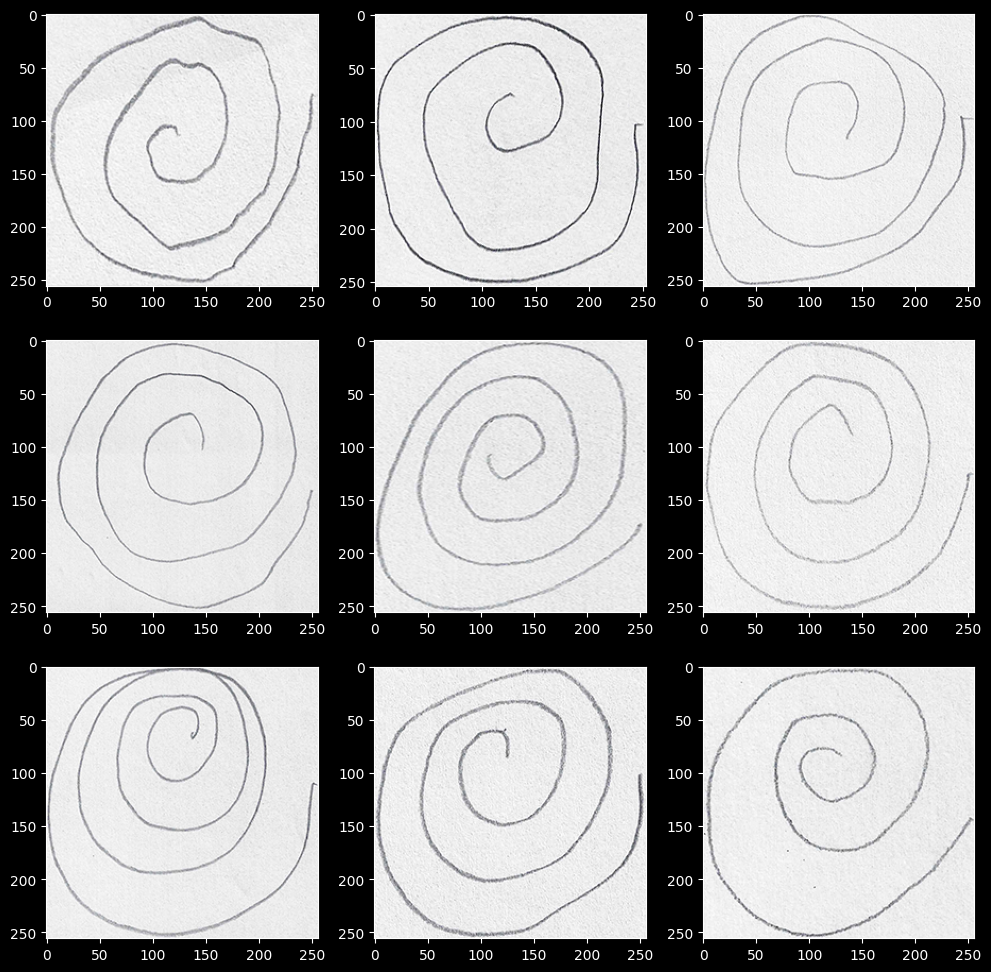

In [17]:
plt.figure(figsize= (12,12))
for i in range(1, 10, 1):
    plt.subplot(3,3,i)
    img = load_img("../input/parkinsons-drawings/spiral/training/healthy/"+
                  os.listdir("../input/parkinsons-drawings/spiral/training/healthy")[i])
    plt.imshow(img)   
plt.show() 

## 2.2 Spiral Drawings for +ve patients

Below is the plot for the dataset for parkinson positive patients.

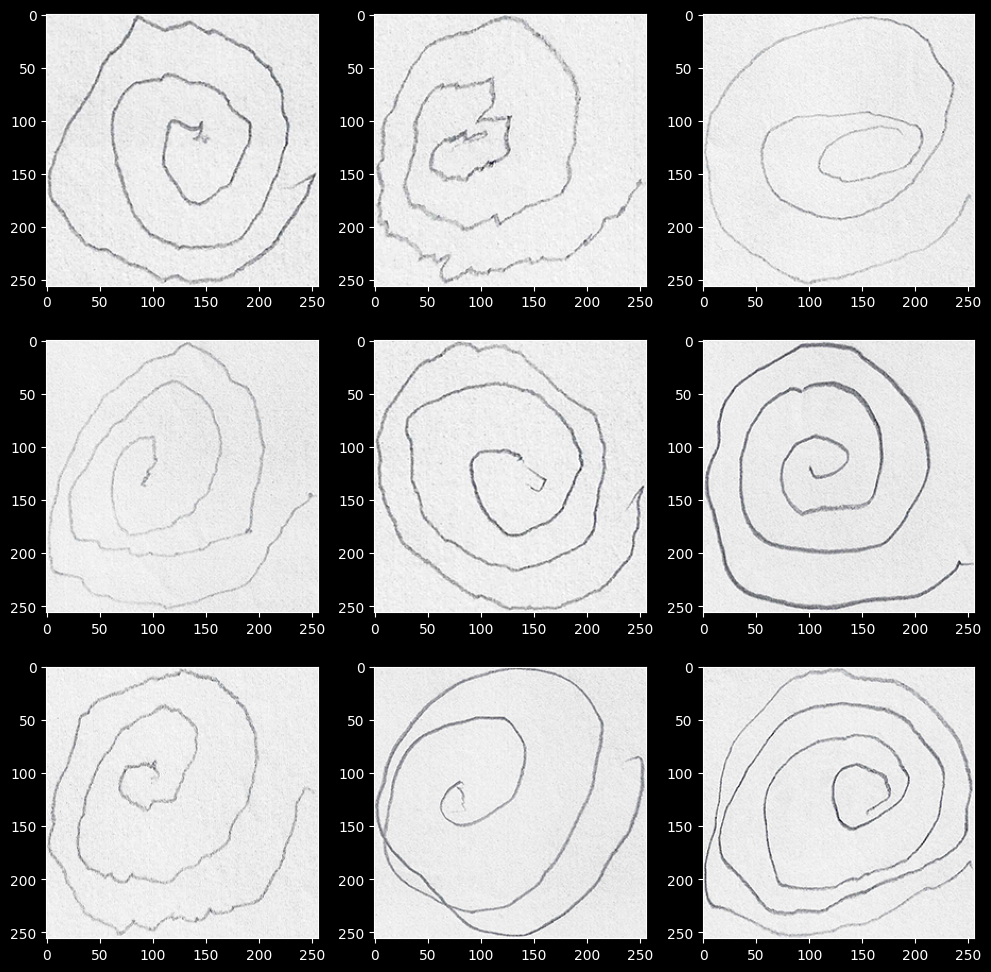

In [14]:
plt.figure(figsize=(12, 12))
for i in range(1, 10, 1):
    plt.subplot(3, 3, i)
    img = load_img("../input/parkinsons-drawings/spiral/training/parkinson/" +
                   os.listdir("../input/parkinsons-drawings/spiral/training/parkinson")[i])
    plt.imshow(img)
plt.show()

## 2.3 Wave form drawing for -ve patients

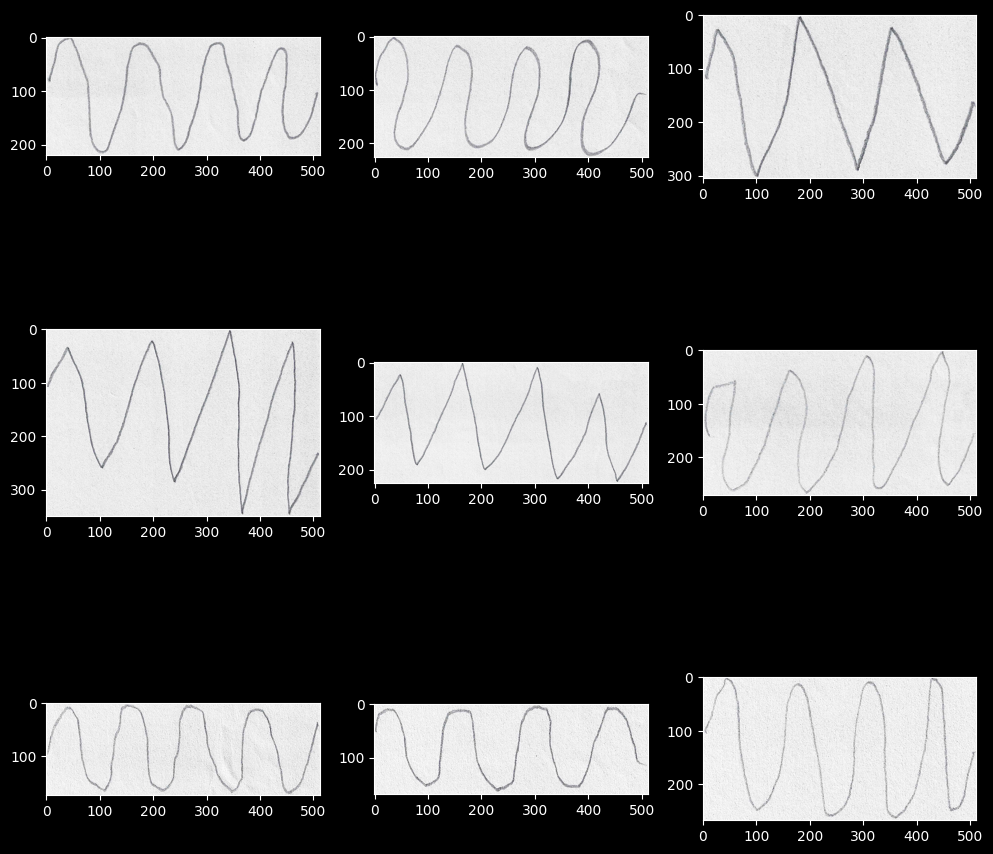

In [18]:
plt.figure(figsize=(12, 12))
for i in range(1, 10, 1):
    plt.subplot(3, 3, i)
    img = load_img("../input/parkinsons-drawings/wave/training/healthy/"+
                  os.listdir("../input/parkinsons-drawings/wave/training/healthy")[i])
    plt.imshow(img)
plt.show()

## 2.4 Wave form drawing for +ve patients

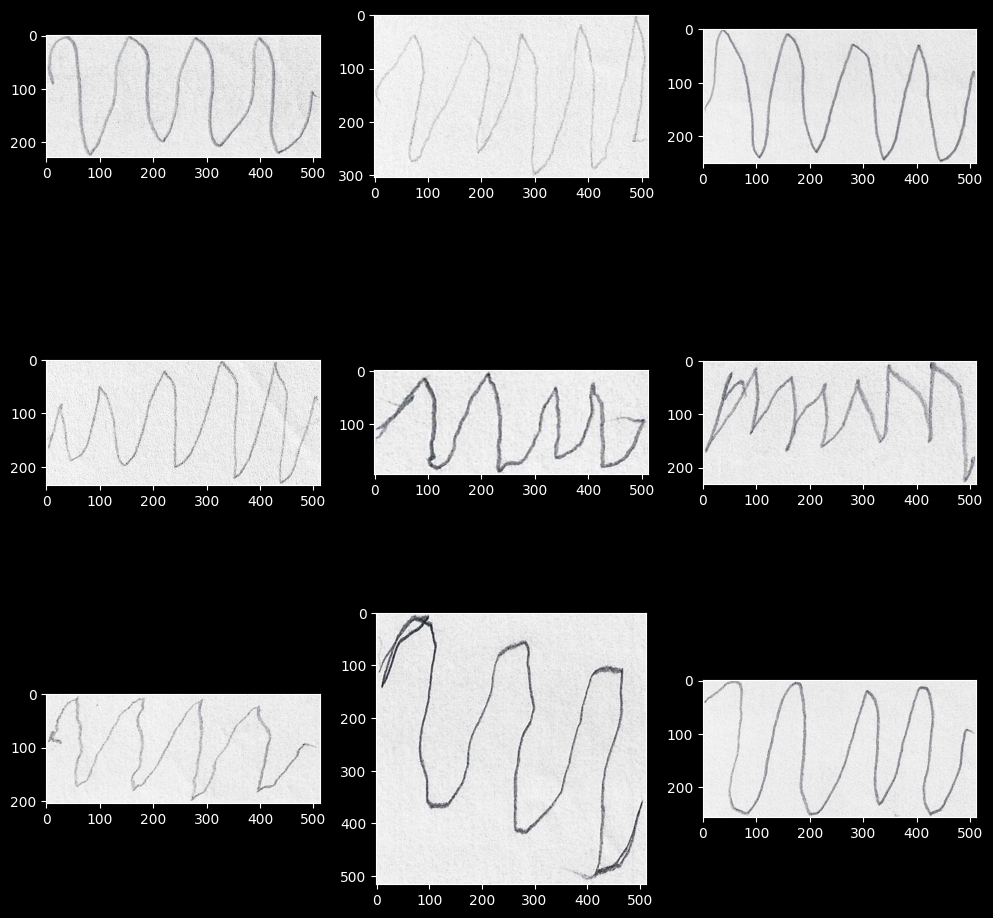

In [19]:
plt.figure(figsize= (12,12))
for i in range(1, 10, 1):
    plt.subplot(3,3,i)
    img = load_img("../input/parkinsons-drawings/wave/training/parkinson/"+
                  os.listdir("../input/parkinsons-drawings/wave/training/parkinson")[i])
    plt.imshow(img)   
plt.show()

# 3. Implementing a CNN 

## 3.1 Model Architecture

In [20]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

In [24]:
classifier=Sequential()
classifier.add(Conv2D(32,(3,3),input_shape=(128, 128, 3),activation='relu'))
classifier.add(MaxPooling2D(pool_size=(2,2)))
classifier.add(Conv2D(32,(3,3),activation='relu'))
classifier.add(MaxPooling2D(pool_size=(2,2)))
classifier.add(Flatten())
classifier.add(Dense(activation='relu',units=128))
classifier.add(Dense(activation='sigmoid',units=1))

In [27]:
!pip install tensorflow

## 3.2 Image generator

In [64]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [65]:
train_datagen = ImageDataGenerator(rescale = 1./255,
                                  shear_range = 0.2,
                                  zoom_range = 0.2,
                                  horizontal_flip=True)

test_datagen = ImageDataGenerator(rescale = 1./255)

## 3.3  spiral train-test generator

In [66]:
spiral_train_generator = train_datagen.flow_from_directory("../input/parkinsons-drawings/spiral/training",
                                                          target_size = (128, 128),
                                                          batch_size = 32,
                                                          class_mode = "binary"
                                                          )

spiral_test_generator = test_datagen.flow_from_directory("../input/parkinsons-drawings/spiral/testing",
                                                        target_size = (128, 128),
                                                        batch_size = 32,
                                                        class_mode = "binary"
                                                        )

Found 72 images belonging to 2 classes.
Found 30 images belonging to 2 classes.


## 3.4 Wave train-test generator

In [67]:
wave_train_generator = train_datagen.flow_from_directory("../input/parkinsons-drawings/spiral/training",
                                                        target_size=(128, 128),
                                                        batch_size = 32,
                                                        class_mode = "binary")

wave_test_generator = train_datagen.flow_from_directory("../input/parkinsons-drawings/spiral/testing",
                                                        target_size = (128, 128),
                                                        batch_size = 32,
                                                        class_mode = "binary")

Found 72 images belonging to 2 classes.
Found 30 images belonging to 2 classes.


## 3.5 Optimization of model using ```Adam```

In [81]:
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau


early_stopping = EarlyStopping(
    monitor='val_loss',
    min_delta=0,
    patience=10, 
    verbose=1,
    restore_best_weights=True
)

reduce_learningrate = ReduceLROnPlateau(
    monitor='val_loss',
    factor=0.2,
    patience=5, 
    verbose=1,
    min_delta=0.0001
)

callbacks_list = [early_stopping, reduce_learningrate]

epochs = 10 
classifier.compile(
    loss='binary_crossentropy',
    optimizer=Adam(learning_rate=0.001),
    metrics=['accuracy']
)

# Assuming you are using a fit method with generators
history = classifier.fit(
    spiral_train_generator,
    steps_per_epoch=spiral_train_generator.n // spiral_train_generator.batch_size,
    epochs=epochs,  # Use the number of epochs defined
    validation_data=spiral_test_generator,
    validation_steps=spiral_test_generator.n // spiral_test_generator.batch_size,
    callbacks=callbacks_list
)


Epoch 1/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 3s 760ms/step - accuracy: 0.3500 - loss: 0.6944 - val_accuracy: 0.5000 - val_loss: 0.6932 - learning_rate: 0.0010
Epoch 2/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 202ms/step - accuracy: 0.5000 - loss: 0.6932 - val_accuracy: 0.5000 - val_loss: 0.6932 - learning_rate: 0.0010
Epoch 3/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 298ms/step - accuracy: 0.4188 - loss: 0.6939 - val_accuracy: 0.5000 - val_loss: 0.6933 - learning_rate: 0.0010
Epoch 4/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 207ms/step - accuracy: 0.5938 - loss: 0.6923 - val_accuracy: 0.5000 - val_loss: 0.6933 - learning_rate: 0.0010
Epoch 5/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 301ms/step - accuracy: 0.4292 - loss: 0.6942 - val_accuracy: 0.5000 - val_loss: 0.6932 - learning_rate: 0.0010
Epoch 6/10
1/2 ━━━━━━━━━━━━━━━━━━━━ 0s 290ms/step - accuracy: 0.5938 - loss: 0.6923
Epoch 6: ReduceLROnPlateau reducing learning rate to 0.00020000000949949026.
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 211ms/step - accuracy: 0.5938 - loss: 0.6923 - val_accuracy: 

# 4. Output - `Accuracy` and `Loss`

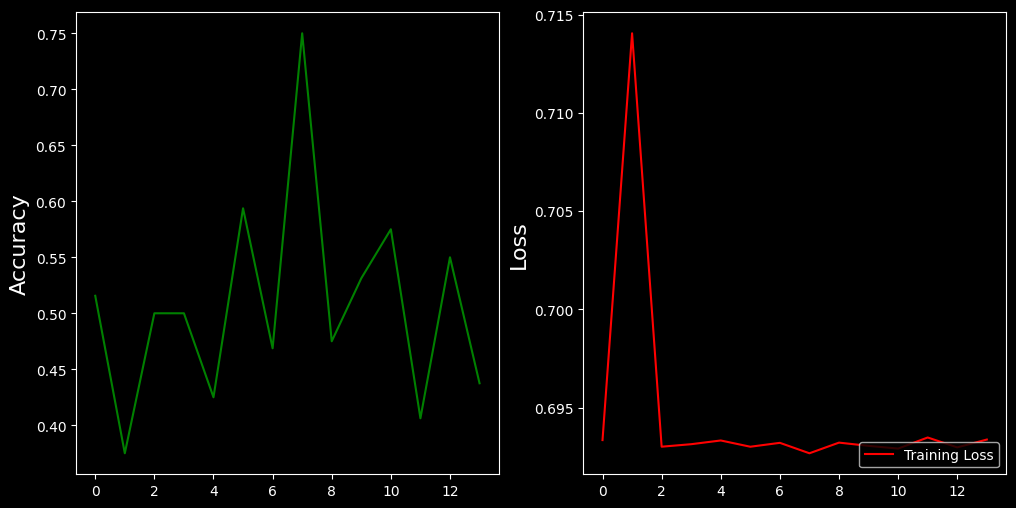

In [69]:
plt.style.use('dark_background')
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.ylabel('Accuracy', fontsize=16)
plt.plot(history.history['accuracy'], label='Training Loss', color='green')

plt.subplot(1, 2, 2)
plt.ylabel('Loss', fontsize=16)
plt.plot(history.history['loss'], label='Training Loss', color='red')
plt.legend(loc='lower right')
plt.show()

# 5. Saving the model as `model63.h5`

In [73]:
classifier.save('/kaggle/working/model63.h5')

---
```End of notebook```